# data augmentation test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import joblib
from model.utils import EarlyStopping
from model.residual_attention_network import ResidualAttentionNetwork

from preprocessor import PreProcessorWithAugmentation as Preprocess
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
from tqdm import tqdm

from hyperparameter import HyperParams as hp

/home/ubuntu/anaconda3/envs/gpu/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
print("start to train ResidualAttentionModel.")
info = joblib.load(hp.SAVE_DIR / 'info.pkl')

start to train ResidualAttentionModel.


In [3]:
info

{'data_size': {'test': 10000, 'train': 43750, 'valid': 6250},
 'image_size': {'channel': 3, 'height': 32, 'width': 32}}

In [4]:
print("define preprocessor...")
preprocess = Preprocess()

define preprocessor...


In [5]:
print("load TFRecord...")
train_path = str(hp.SAVE_DIR / 'train*.tfrecord')
valid_path = str(hp.SAVE_DIR / 'valid*.tfrecord')
test_path = str(hp.SAVE_DIR / 'test*.tfrecord')
image_size = info['image_size']
train_dataset = preprocess.load_tfrecords_dataset(train_path, image_size, 10)
valid_dataset = preprocess.load_tfrecords_dataset(train_path, image_size, 10)
test_dataset = preprocess.load_tfrecords_dataset(test_path, image_size, 10)

load TFRecord...


In [6]:
# get iterator
print("get iterator...")
aug_kwargs_train = {
    'resize_h': 40,
    'resize_w': 40,
    'input_h': 32,
    'input_w': 32,
    'channel': 3,
    'is_training': True,
}
train_iterator = preprocess.get_iterator(
    train_dataset, batch_size=hp.BATCH_SIZE, num_epochs=hp.NUM_EPOCHS, buffer_size=10 * hp.BATCH_SIZE,
    aug_kwargs=aug_kwargs_train)
aug_kwargs_valid = {
    'resize_h': 40,
    'resize_w': 40,
    'input_h': 32,
    'input_w': 32,
    'channel': 3,
    'is_training': False,
}
valid_iterator = preprocess.get_iterator(
    train_dataset, batch_size=hp.VALID_BATCH_SIZE, num_epochs=hp.NUM_EPOCHS, buffer_size=100 * hp.VALID_BATCH_SIZE,
    aug_kwargs=aug_kwargs_valid)

test_iterator = preprocess.get_iterator(
    test_dataset, batch_size=hp.VALID_BATCH_SIZE, num_epochs=hp.NUM_EPOCHS, buffer_size=100 * hp.VALID_BATCH_SIZE,
    aug_kwargs=aug_kwargs_valid)
train_batch = train_iterator.get_next()
valid_batch = valid_iterator.get_next()
test_batch = test_iterator.get_next()

get iterator...


In [7]:
train_X = []
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(1):
        n_batches = info["data_size"]["train"] // hp.BATCH_SIZE
        # train
        train_costs = []
        for i in tqdm(range(n_batches)):
            train_X_mb, train_y_mb = sess.run(train_batch)
            train_X.append(train_X_mb)

100%|██████████| 683/683 [00:23<00:00, 28.72it/s]


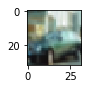

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(train_X_mb[1])
plt.show()

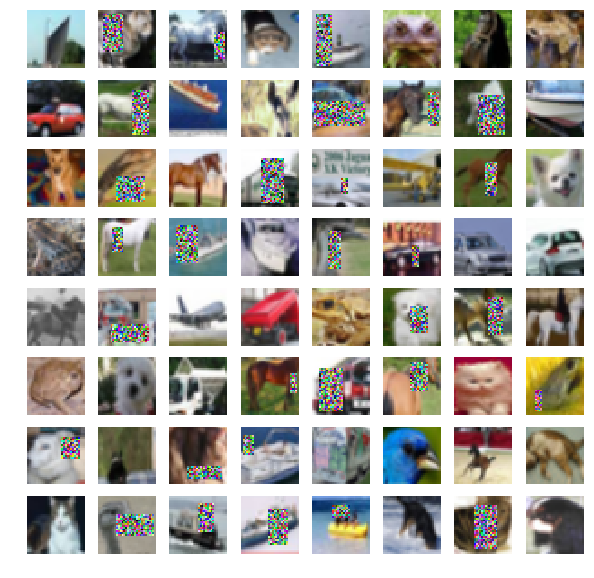

In [9]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(train_X[0][i])
    plt.axis('off')
plt.show()